## Quy trình EDA

### Nhật ký : EDA 
Mục đích : Trực quan hóa dữ liệu để phát hiện kiến thức và sự tương quan mà dữ liệu mang lại sau đó là tiền xử lí dữ liệu đơn giản 

#### Nhập thư viện cần thiết 

In [1]:
# Thư viện xử lý dữ liệu và trực quan hóa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import set_option
from matplotlib import pyplot
from pandas.plotting import scatter_matrix


#### Đọc dữ liệu 

In [2]:
# Đọc dữ liệu train và test
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


#### Kiểm tra nhanh dữ liệu 

In [3]:
# Xem 5 dòng đầu tiên và tổng quan thông tin 
display(train_df.head())
train_df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Peek at data (Xem trước dữ liệu Titanic)

In [4]:
names = [ 'PassengerId' , 'Survived' , 'Pclass' , 'Name' , 'Sex' , 'Age' , 'SibSp' , 'Parch' ,'Ticket' , 'Fare' , 'Cabin' , 'Embarked']
peek = train_df.head(20)
print(peek)

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.

#### Dimention of your data (Kích thước của dữ liệu Titanic)

In [5]:
names = [ 'PassengerId' , 'Survived' , 'Pclass' , 'Name' , 'Sex' , 'Age' , 'SibSp' , 'Parch' ,'Ticket' , 'Fare' , 'Cabin' , 'Embarked']
shape = train_df.shape
print(shape)

(891, 12)


#### Nhận xét : Bộ dữ liệu của ta có 891 dòng 12 cột

#### Data type for each attribute (Kiểu dữ cho từng đặc trưng)

In [6]:
names = [ 'PassengerId' , 'Survived' , 'Pclass' , 'Name' , 'Sex' , 'Age' , 'SibSp' , 'Parch' ,'Ticket' , 'Fare' , 'Cabin' , 'Embarked']
types = train_df.dtypes
print(types)

print(train_df.isnull().sum())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Nhận xét 

+ Bộ dữ liệu có kiểu dữ liệu float(2) , int(5) , object(5)

+ Dữ liệu đặc biệt là Age , Cabin và Embarked 

+ Dữ liệu bị thiếu là Age(177 dòng) , Cabin(687 dòng) và Embarked(2 dòng) 

#### Desciptive Staistics (Thống kê mô tả dữ liệu)

In [7]:
set_option('display.width', 100)
set_option('display.precision', 3)
description = train_df.describe()
print(description)

       PassengerId  Survived   Pclass      Age    SibSp    Parch     Fare
count      891.000   891.000  891.000  714.000  891.000  891.000  891.000
mean       446.000     0.384    2.309   29.699    0.523    0.382   32.204
std        257.354     0.487    0.836   14.526    1.103    0.806   49.693
min          1.000     0.000    1.000    0.420    0.000    0.000    0.000
25%        223.500     0.000    2.000   20.125    0.000    0.000    7.910
50%        446.000     0.000    3.000   28.000    0.000    0.000   14.454
75%        668.500     1.000    3.000   38.000    1.000    0.000   31.000
max        891.000     1.000    3.000   80.000    8.000    6.000  512.329


#### Thông tin bảng 

+ count : Số lượng giá trị không bị thiếu

+ mean : Giá trị trung bình

+ std : Độ lệch chuẩn

+ min, max : Giá trị nhỏ nhất và lớn nhất

+ 25%, 50%, 75% : Các phân vị (quartile)

##  Phân tích thống kê mô tả dữ liệu Titanic

| Cột | Ý nghĩa | Nhận xét thống kê chi tiết |
|------|-----------|-----------------------------|
| **PassengerId** | Mã định danh hành khách | Có 891 giá trị (đầy đủ, không thiếu). Giá trị tăng dần từ 1 đến 891 ⇒ chỉ là ID, không mang thông tin phân tích. |
| **Survived** | Tình trạng sống sót (0 = chết, 1 = sống) | Trung bình = **0.384** ⇒ tỷ lệ sống sót khoảng **38.4%**, tức chỉ khoảng 4/10 hành khách sống sót. Độ lệch chuẩn **0.487** cho thấy dữ liệu chia khá đều giữa hai nhóm. |
| **Pclass** | Hạng vé (1 = cao, 3 = thấp) | Trung bình **2.309**, nghĩa là đa số hành khách ở **hạng vé 3** (bình dân). Độ lệch chuẩn **0.836** ⇒ chênh lệch giữa các hạng đáng kể. |
| **Age** | Tuổi hành khách | Có 714 giá trị hợp lệ (thiếu 177). Trung bình **≈ 29.7 tuổi**, độ lệch chuẩn **14.5**, dao động lớn. Min = 0.42, Max = 80 ⇒ có cả **trẻ sơ sinh và người già**. 25% = 20, 50% = 28, 75% = 38 ⇒ phần lớn hành khách trong độ tuổi **20–40**. |
| **SibSp** | Số anh/chị/em/vợ/chồng đi cùng | Trung bình **0.523**, độ lệch chuẩn **1.103**, giá trị lớn nhất **8** ⇒ đa số hành khách đi **một mình hoặc với 1 người thân**. |
| **Parch** | Số cha/mẹ/con đi cùng | Trung bình **0.382**, độ lệch chuẩn **0.806**, giá trị tối đa **6** ⇒ phần lớn đi **một mình**, ít người đi cùng cha mẹ hoặc con. |
| **Fare** | Giá vé | Trung bình **32.2**, độ lệch chuẩn **49.7**, dao động lớn. Min = 0, Max = 512.33 ⇒ có hành khách **miễn phí hoặc rất giàu**. Phân phối có **đuôi phải dài (right-skewed)** do vài giá trị cực đại. |


#### Nhận xét tổng quan

1. **Tỷ lệ sống sót thấp (~38%)**: cho thấy mức tử vong cao.  
2. **Tuổi trung bình ~30**: chủ yếu trong độ tuổi lao động (20–40).  
3. **Đa số hành khách đi hạng 3**: gợi ý khả năng sống sót có thể liên quan đến hạng vé.  
4. **Phần lớn đi một mình**: vì SibSp và Parch đều nhỏ.  
5. **Giá vé chênh lệch lớn**: phản ánh phân tầng xã hội rõ rệt.  
6. **Cột Age có missing values (177 dòng)** : cần xử lý trước khi phân tích sâu hoặc huấn luyện mô hình.

#### Kết luận EDA

- Dữ liệu Titanic phân phối **không cân bằng giữa các nhóm** (sống sót < chết, vé 3 nhiều hơn vé 1–2).  
- Các biến **Age, Fare** có độ lệch lớn, nên **vẽ biểu đồ Boxplot hoặc Histogram** để xem phân phối chi tiết.  
- Các đặc trưng **Pclass, Sex, Fare, Age** được dự đoán có ảnh hưởng mạnh đến khả năng sống sót.


#### Class Distribution (Sự phân phối của các lớp)

In [8]:
class_counts = train_df.groupby('Survived').size()
print(class_counts)

train_df['Survived'].value_counts(normalize=True)

Survived
0    549
1    342
dtype: int64


Survived
0    0.616
1    0.384
Name: proportion, dtype: float64

#### Nhận xét 

+ 549 hành khách không sống sót với tỉ lệ 61.6%

+ 342 hành khách sống sót với tỉ lệ 38.4%

#### Correlation Between Attributes (Sự tương quan giữa các đặc trưng)

In [9]:
set_option('display.width', 100)
set_option('display.precision', 3)
correlations = train_df.corr(numeric_only=True, method='pearson')
print(correlations)


             PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
PassengerId        1.000    -0.005  -0.035  0.037 -0.058 -0.002  0.013
Survived          -0.005     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass            -0.035    -0.338   1.000 -0.369  0.083  0.018 -0.549
Age                0.037    -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp             -0.058    -0.035   0.083 -0.308  1.000  0.415  0.160
Parch             -0.002     0.082   0.018 -0.189  0.415  1.000  0.216
Fare               0.013     0.257  -0.549  0.096  0.160  0.216  1.000


#### Nhận xét 
Ma trận liệt kê tất cả các thuộc tính (cột) ở hàng trên cùng và cột bên trái,nhằm thể hiện hệ số tương quan giữa mọi cặp thuộc tính trong tập dữ liệu (mỗi cặp xuất hiện hai lần vì ma trận tương quan là đối xứng).Bạn có thể thấy một đường chéo chạy từ góc trên bên trái đến góc dưới bên phải của ma trận đó là những giá trị thể hiện mức tương quan hoàn hảo của mỗi thuộc tính với chính nó.

#### Phân tích tương quan giữa các đặc trưng

| Cặp biến | Mức độ & Chiều hướng | Giải thích |
|-----------|---------------------|-------------|
| **Survived – Pclass:** -0.338 | Tương quan âm trung bình | Hạng vé càng cao (Pclass nhỏ), **khả năng sống sót càng lớn**. Hành khách hạng 1 có tỷ lệ sống sót cao hơn hạng 3. |
| **Survived – Fare:** +0.257 | Tương quan dương yếu | **Giá vé cao → khả năng sống sót cao hơn**, phù hợp với thực tế rằng hành khách giàu (vé hạng cao) dễ tiếp cận xuồng cứu hộ. |
| **Survived – Age:** -0.077 | Tương quan âm yếu | **Người lớn tuổi có tỷ lệ sống sót thấp hơn** một chút, nhưng mức tương quan nhỏ nên chưa khẳng định mạnh. |
| **Pclass – Fare:** -0.549 | Tương quan âm mạnh | Rất hợp lý: **hạng vé càng thấp (3) thì giá vé càng rẻ**, đây là mối quan hệ gần như tuyến tính. |
| **SibSp – Parch:** +0.415 | Tương quan dương vừa phải | Hành khách có nhiều anh/chị/em thường cũng có **nhiều người thân (cha mẹ/con)** đi cùng. Hai đặc trưng này phản ánh “đi cùng gia đình”. |
| **Age – SibSp:** -0.308 | Tương quan âm yếu đến trung bình | Người trẻ tuổi thường có nhiều anh/chị/em đi cùng hơn; người lớn tuổi thường đi một mình. |
| **Fare – Parch:** +0.216 | Tương quan dương yếu | Hành khách có nhiều người thân đi cùng có xu hướng **mua vé giá cao hơn** (có thể mua nhóm vé gia đình). |
| **Các mối khác (PassengerId, Age–Fare, v.v.)** | Tương quan rất thấp | Không có quan hệ tuyến tính đáng kể; chỉ mang tính định danh hoặc nhiễu. |

#### Tổng kết nhận xét

1. **Mối tương quan mạnh nhất** là giữa `Pclass` và `Fare` (-0.55) ⇒ hạng vé thấp hơn đi kèm với giá vé rẻ hơn.  
2. **Khả năng sống sót (Survived)** có **tương quan âm với Pclass** và **tương quan dương với Fare**, cho thấy **địa vị xã hội ảnh hưởng đến cơ hội sống sót**.  
3. Các mối khác (Age, SibSp, Parch) có tương quan yếu ⇒ có thể ảnh hưởng phi tuyến hoặc chỉ khi kết hợp với biến khác (ví dụ Sex, Embarked).  
4. `PassengerId` không mang ý nghĩa phân tích, chỉ là chỉ số định danh.  

#### Skew of Univariate Distributions (Độ lệch của phân phối đơn biến)

In [10]:
numeric_cols = train_df.select_dtypes(include='number')
skew = numeric_cols.skew()
print(skew)


PassengerId    0.000
Survived       0.479
Pclass        -0.631
Age            0.389
SibSp          3.695
Parch          2.749
Fare           4.787
dtype: float64


####  Nhận xét 

Kết quả độ lệch (skew) cho biết phân phối có lệch phải (dương) , hoặc lệch trái (âm) . Các giá trị gần 0 cho thấy phân phối gầm đối xứng hơn , tức là ít bị lệch

#### Skew of Univariate Distributions (Độ lệch của phân phối đơn biến)

Độ lệch (Skewness) phản ánh mức độ bất đối xứng của phân phối dữ liệu:

| Biến | Skewness | Nhận xét |
|------|-----------|----------|
| **PassengerId** | 0.000 | Phân phối đối xứng – dữ liệu trải đều, không bị lệch. |
| **Survived** | 0.479 | Lệch phải nhẹ (dương) – có nhiều hành khách không sống sót hơn sống sót. |
| **Pclass** | -0.631 | Lệch trái nhẹ (âm) – có nhiều hành khách thuộc hạng 3 hơn các hạng cao. |
| **Age** | 0.389 | Lệch phải nhẹ – phần lớn hành khách có độ tuổi trung bình, ít người lớn tuổi. |
| **SibSp** | 3.695 | Lệch phải mạnh – đa số hành khách đi một mình, rất ít người đi cùng nhiều anh chị em/vợ chồng. |
| **Parch** | 2.749 | Lệch phải mạnh – đa số không đi cùng cha mẹ/con cái, chỉ một số ít có đi cùng. |
| **Fare** | 4.787 | Lệch phải rất mạnh – hầu hết hành khách trả vé rẻ, chỉ một vài người mua vé hạng sang với giá rất cao. |

**Kết luận:**  
Các biến như `SibSp`, `Parch`, và đặc biệt `Fare` có độ lệch dương rất cao, cho thấy phân phối bị kéo dài về phía giá trị lớn (long right tail).  
Điều này gợi ý rằng **nên áp dụng log-transform hoặc scaling** cho các biến này trước khi đưa vào mô hình học máy để giảm tác động của outlier và cải thiện tính phân phối chuẩn.

#### Trực quan hóa Data

Biểu đồ đơn biến

#### Biểu đồ Histogram

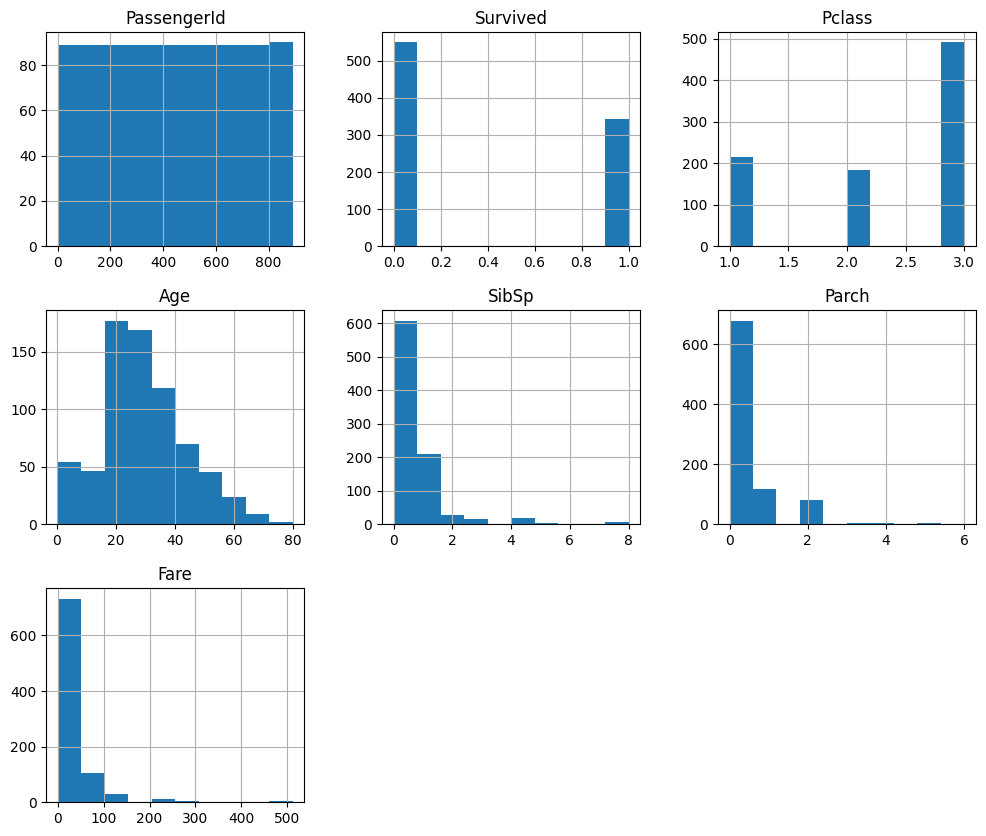

In [11]:

numeric_cols = train_df.select_dtypes(include='number')
numeric_cols.hist(figsize=(12,10))
plt.show()


#### Histogram (Biểu đồ tần suất)

Biểu đồ Histogram thể hiện phân phối của 7 đặc trưng định lượng trong bộ dữ liệu Titanic:

- **PassengerId**: Phân phối đồng đều từ 1 đến 891 — đây chỉ là mã định danh nên không mang ý nghĩa thống kê thực tế.
- **Survived**: Biến nhị phân (0 = không sống sót, 1 = sống sót). Biểu đồ cho thấy số người **không sống sót** chiếm đa số (~62%), còn người **sống sót** chiếm khoảng 38%.
- **Pclass**: Phân phối rời rạc với 3 giá trị (1, 2, 3). Phần lớn hành khách thuộc **hạng 3** (bình dân), ít người ở **hạng 1** (cao cấp).
- **Age**: Có dạng gần chuẩn, tập trung nhiều trong khoảng **20–35 tuổi**, ít trẻ nhỏ và người già.
- **SibSp**: Đa số giá trị là **0**, cho thấy phần lớn hành khách **đi một mình**, chỉ một số ít đi cùng 1–2 người thân.
- **Parch**: Cũng tương tự SibSp, đa số là 0, nghĩa là phần lớn **không đi cùng cha mẹ hay con cái**.
- **Fare**: Phân phối **lệch phải mạnh**, đa số hành khách mua vé giá thấp (dưới 50), chỉ vài người trả giá cao (>200).

=> Tổng thể, histogram cho thấy bộ dữ liệu bị **lệch phải** ở các biến như Fare, SibSp, Parch và có sự **mất cân bằng rõ rệt trong biến Survived**.


#### Biểu đồ mật độ Density

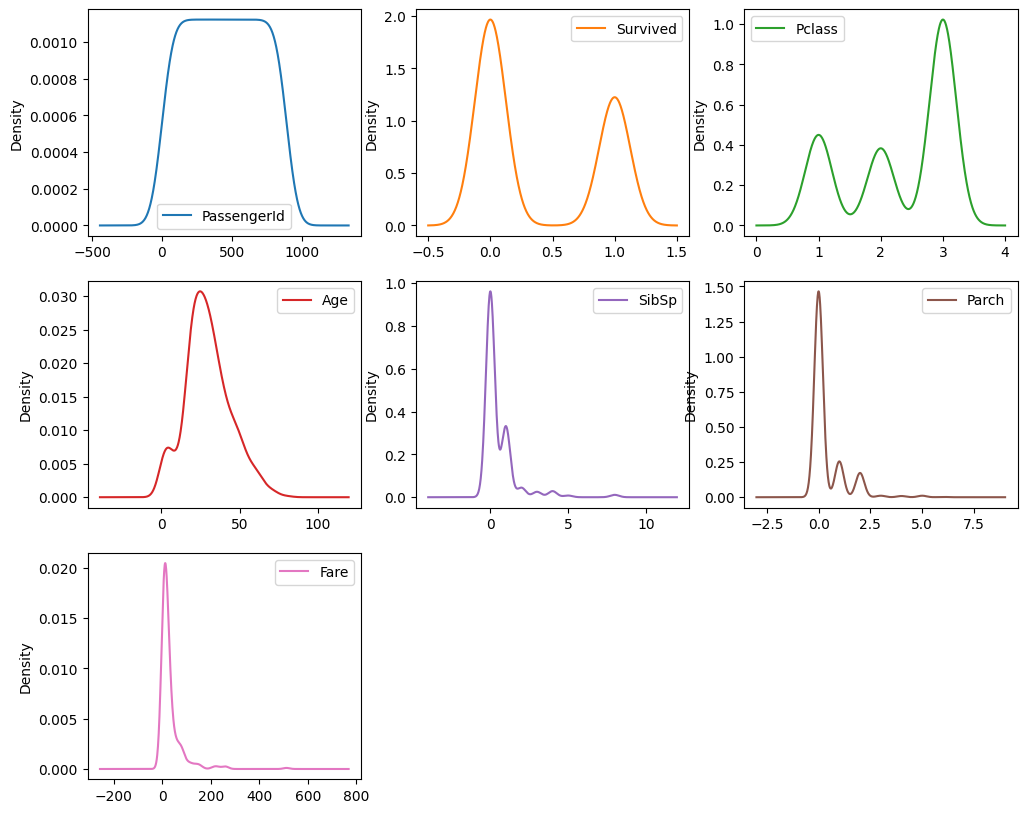

In [12]:
train_df.select_dtypes(include='number').plot(
    kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12,10)
)
plt.show()


#### Density Plot (Biểu đồ mật độ)

Biểu đồ mật độ giúp nhận biết hình dạng phân phối liên tục của 7 đặc trưng:

- **PassengerId**: Mật độ phân bố đều — xác nhận đây là biến thứ tự, không có ý nghĩa thống kê.
- **Survived**: Hai đỉnh tách biệt ở 0 và 1; tỷ lệ vùng dưới đỉnh 0 lớn hơn nhiều → cho thấy mất cân bằng dữ liệu.
- **Pclass**: Ba đỉnh riêng biệt, trong đó đỉnh **Pclass = 3** cao nhất → hành khách hạng thấp chiếm số đông.
- **Age**: Phân phối mượt, cao nhất khoảng 30 tuổi, giảm dần về hai phía → cho thấy hành khách chủ yếu là người trưởng thành.
- **SibSp**: Mật độ tập trung cực mạnh ở 0 và giảm nhanh khi số người thân tăng lên → xác nhận phần lớn đi một mình.
- **Parch**: Phân bố tương tự SibSp, phần lớn bằng 0, chỉ một vài có giá trị > 2.
- **Fare**: Có đỉnh rất nhọn ở giá trị thấp (~10–30), sau đó kéo dài đuôi phải rất xa → biểu hiện lệch phải mạnh (right-skewed).

=> Biểu đồ mật độ giúp xác định các biến **có phân phối không chuẩn (non-normal)** như Fare, SibSp, Parch và gợi ý cần **chuẩn hóa (scaling/log transform)** khi huấn luyện mô hình.


#### Biểu đồ Box và Whisker

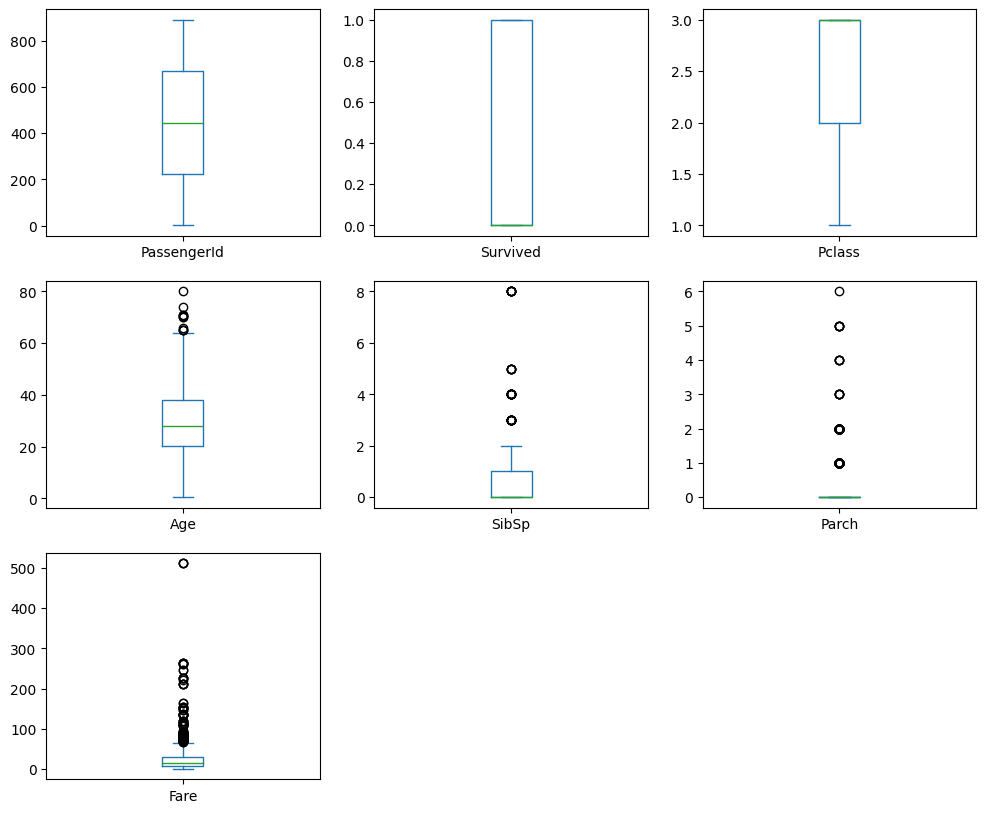

In [13]:
numeric_cols = train_df.select_dtypes(include='number')
numeric_cols.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))
plt.show()

#### Boxplot (Biểu đồ hộp)

Boxplot minh họa độ phân tán, trung vị và ngoại lai của 7 đặc trưng định lượng:

- **PassengerId**: Phân phối đều, không có ngoại lai — chỉ mang tính thứ tự.
- **Survived**: Hai mức 0–1, không có giá trị trung gian, không có ngoại lệ.
- **Pclass**: Ba mức 1–3, giá trị càng cao → hạng càng thấp. Không có ngoại lai.
- **Age**: Phân bố khá đều, trung vị khoảng 28 tuổi. Một số điểm ngoại lai là **người cao tuổi (~70–80)**.
- **SibSp**: Trung vị = 0, nhiều điểm ngoại lai ở các giá trị cao (5–8) → ít người đi cùng nhiều thân nhân.
- **Parch**: Trung vị = 0, cũng có vài ngoại lai ở 5–6.
- **Fare**: Nhiều ngoại lai phía trên 200, biểu hiện sự **chênh lệch giá vé lớn** giữa hành khách bình dân và thượng lưu.

=> Boxplot chỉ ra sự tồn tại của **nhiều giá trị ngoại lai (outliers)** ở **Fare, SibSp, Parch**, cần được xem xét khi chuẩn bị dữ liệu.


#### Trực quan hóa Data

Biểu đồ đa biến 

#### Biểu đồ Corrolation heatmap(Bản đồ nhiệt tương quan)

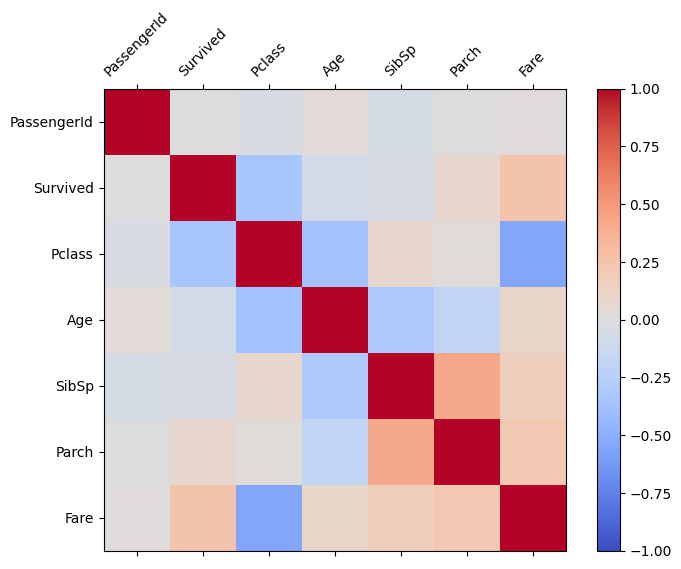

In [ ]:
numeric_cols = train_df.select_dtypes(include='number')
correlations = numeric_cols.corr()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')
fig.colorbar(cax)

ticks = np.arange(len(numeric_cols.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_cols.columns, rotation=45)
ax.set_yticklabels(numeric_cols.columns)

plt.show()


#### Nhận xét

Chúng ta có thể thấy ma trận là đối xứng, tức là phần góc dưới bên trái giống với góc trên bên phải. Điều này hữu ích vì cho phép chúng ta nhìn hai cách khác nhau về cùng một dữ liệu trên cùng một biểu đồ.
Chúng ta cũng có thể thấy rằng mỗi biến đều có mối tương quan dương hoàn hảo với chính nó (như mong đợi) trên đường chéo từ góc trên bên trái xuống góc dưới bên phải.

#### Correlation Heatmap (Bản đồ nhiệt tương quan)

Bản đồ nhiệt thể hiện mức độ tương quan giữa 7 đặc trưng định lượng:

- **Survived ↔ Fare (r = 0.26)**: tương quan dương vừa phải — hành khách trả vé cao có khả năng sống sót cao hơn.
- **Survived ↔ Pclass (r = -0.33)**: tương quan âm — hành khách hạng cao (Pclass thấp) có cơ hội sống cao hơn.
- **Pclass ↔ Fare (r = -0.55)**: tương quan âm mạnh — vé càng rẻ thì hạng càng thấp.
- **SibSp ↔ Parch (r = 0.41)**: tương quan dương khá mạnh — người có anh/chị/em đi cùng thường có cả cha mẹ hoặc con đi cùng.
- **Age** có tương quan yếu với các biến khác — tuổi không ảnh hưởng rõ rệt đến giá vé hoặc khả năng sống sót.
- **PassengerId** gần như độc lập, không tương quan với bất kỳ biến nào.

=> Bản đồ nhiệt giúp xác định **Fare, Pclass, Survived** là các biến quan trọng nhất, có **liên hệ chặt chẽ với nhau** và ảnh hưởng mạnh đến hành vi sống sót.


#### Biểu đồ Scatter Matrix (Ma trận phân tán)

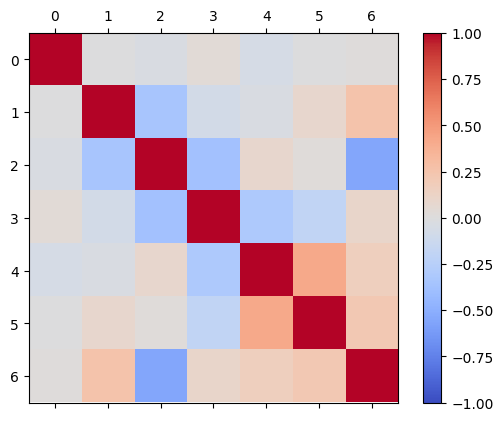

In [15]:
numeric_cols = train_df.select_dtypes(include='number')
correlations = numeric_cols.corr()

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')
fig.colorbar(cax)
pyplot.show()

#### Scatter Matrix (Ma trận phân tán)

Ma trận phân tán thể hiện mối quan hệ trực quan giữa từng cặp đặc trưng:

- **Fare vs Pclass**: Mối quan hệ ngược rõ rệt — vé đắt hơn tương ứng hạng cao hơn.
- **Age vs Fare**: Không có xu hướng tuyến tính — giá vé không phụ thuộc độ tuổi.
- **SibSp vs Parch**: Có mối quan hệ dương nhẹ, xuất hiện cụm điểm tại (0,0) → phần lớn đi một mình.
- **Survived** kết hợp với các biến khác (như Fare, Pclass) cho thấy sự phân tách tương đối rõ giữa nhóm sống sót và không sống sót.
- **PassengerId** không tạo xu hướng với bất kỳ biến nào — chỉ dùng để đánh chỉ số.

=> Ma trận phân tán giúp ta hình dung **tính độc lập và mối tương quan phi tuyến** giữa các đặc trưng, hỗ trợ chọn đặc trưng đầu vào hợp lý cho mô hình.


#### Biểu đồ phân tán 

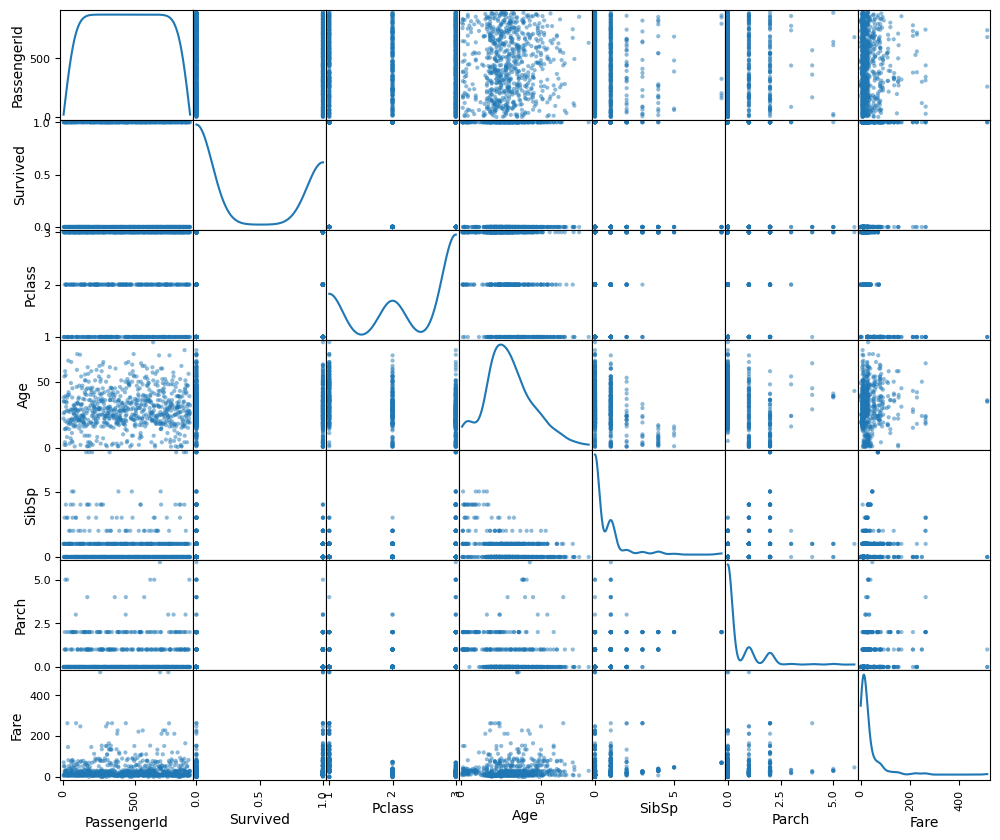

In [ ]:
numeric_cols = train_df.select_dtypes(include='number')
scatter_matrix(numeric_cols, figsize=(12,10), diagonal='kde')
plt.show()


#### Nhận xét 

Giống như biểu đồ ma trận tương quan ở trên, ma trận scatter plot cũng đối xứng.
Điều này hữu ích để quan sát mối quan hệ từng cặp biến từ các góc nhìn khác nhau.
Vì không cần thiết phải vẽ scatter plot của một biến với chính nó, nên đường chéo sẽ hiển thị histogram (biểu đồ tần suất) của từng thuộc tính.

#### Scatter Matrix (Ma trận phân tán)

Biểu đồ ma trận phân tán thể hiện mối quan hệ giữa 7 đặc trưng số:
**PassengerId, Survived, Pclass, Age, SibSp, Parch và Fare.**

- `Survived` có xu hướng **tương quan âm với Pclass** (hạng cao sống nhiều hơn).  
- `Fare` có **phân phối lệch phải**, giá vé cao gắn liền với cơ hội sống cao.  
- `Age` trải rộng nhưng tập trung nhiều ở nhóm tuổi trẻ.  
- `SibSp` và `Parch` thể hiện **mối quan hệ dương**, biểu hiện nhóm đi cùng gia đình.  
- `PassengerId` chỉ là định danh, không có ý nghĩa phân tích.

Tổng thể, `Pclass` và `Fare` là hai yếu tố có ảnh hưởng rõ rệt nhất đến khả năng sống sót.


# Làm sạch dữ liệu hoặc điền các giá trị bị thiếu

#### Simple Row Del Method (Phương pháp xóa dòng đơn giản)

#### Kiểm tra các giá trị bị thiếu (NaN) trong dữ liệu huấn luyện

In [17]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### Kiểm tra các giá trị bị thiếu (NaN) trong dữ liệu huấn luyện

In [18]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Trực quan hóa dữ liệu thiếu (NaN) trong DataFrame bằng biểu đồ Heatmap

<Axes: >

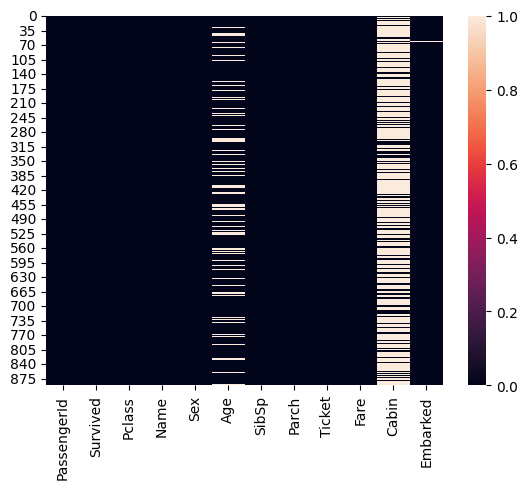

In [19]:
sns.heatmap(train_df.isnull())

#### Tính tỷ lệ phần trăm giá trị thiếu (NaN) trên từng cột trong dữ liệu huấn luyện

In [20]:
null_var = train_df.isnull().sum()/train_df.shape[0] *100
null_var

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Cabin          77.104
Embarked        0.224
dtype: float64

#### Xác định các cột có tỷ lệ giá trị thiếu trên 20% để loại bỏ

In [21]:
drop_column = null_var[null_var >20].keys()
drop_column

Index(['Cabin'], dtype='object')

#### Loại bỏ các cột có tỷ lệ giá trị thiếu trên 20% khỏi dữ liệu huấn luyện

In [22]:
N_Titanic_datA = train_df.drop(columns = drop_column)

#### Tạo các bản sao của dữ liệu huấn luyện để phục vụ các bước xử lý và phân tích khác nhau

In [23]:
Titanic_copy = train_df.copy()
Titanic_copy2 =train_df.copy()
Titanic_Deep = Titanic_copy.copy()

#### Trực quan hóa dữ liệu thiếu (NaN) trong DataFrame đã loại bỏ cột nhiều NaN bằng biểu đồ Heatmap

<Axes: >

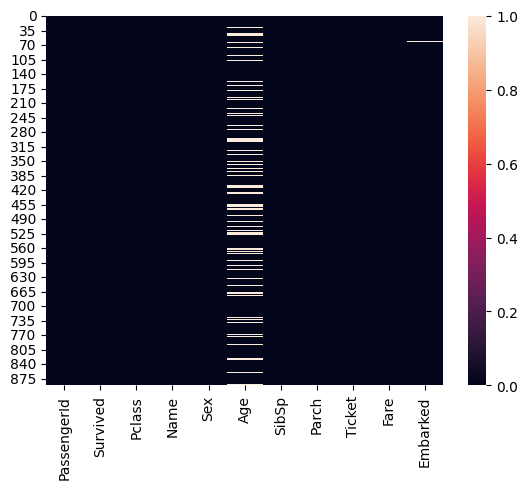

In [24]:
sns.heatmap( N_Titanic_datA.isnull())

#### Tính tỷ lệ phần trăm giá trị thiếu (NaN) trong DataFrame sau khi loại bỏ các cột nhiều NaN

In [25]:
N_Titanic_datA.isnull().sum()/Titanic_Deep.shape[0] *100

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Embarked        0.224
dtype: float64

#### Loại bỏ tất cả các dòng chứa giá trị thiếu (NaN) trong DataFrame đã lọc

In [26]:
N_Titanic_datAA = N_Titanic_datA.dropna()

#### Kiểm tra trực quan dữ liệu sau khi loại bỏ các dòng có giá trị thiếu bằng biểu đồ Heatmap

<Axes: >

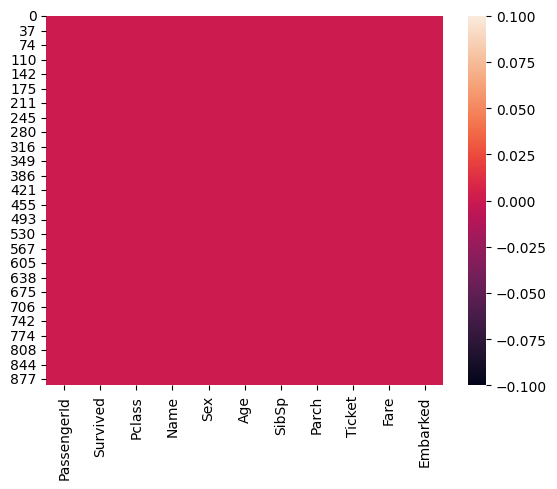

In [27]:
sns.heatmap( N_Titanic_datAA.isnull())

#### Lấy danh sách các cột thuộc kiểu dữ liệu danh mục (categorical) trong tập huấn luyện và tập kiểm tra

In [28]:
Categorical_Values = N_Titanic_datAA.select_dtypes(include=["object"]).columns
Categorical_Values_test = test_df.select_dtypes(include=["object"]).columns

#### Lấy danh sách các cột thuộc kiểu dữ liệu số (numerical) trong tập huấn luyện và tập kiểm tra

In [29]:
Numarical_Values = N_Titanic_datAA.select_dtypes(include=['int64','float64']).columns
Numarical_Values_test = test_df.select_dtypes(include=['int64','float64']).columns

#### Kiểm tra kích thước (số dòng, số cột) của tập dữ liệu kiểm tra

In [30]:
test_df.shape

(418, 11)

#### Hàm so sánh tỷ lệ phân phối phần trăm của biến phân loại trước và sau khi làm sạch dữ liệu

In [31]:
def cat_var_dist(var):
    return pd.concat([Titanic_Deep[var].value_counts()/Titanic_Deep.shape[0] * 100, 
          N_Titanic_datAA[var].value_counts()/N_Titanic_datAA.shape[0] * 100], axis=1,
         keys=[var+'_org', var+'clean'])
    

#### So sánh phân phối phần trăm giá trị của biến 'Ticket' trước và sau khi làm sạch dữ liệu

In [32]:
cat_var_dist("Ticket")

,Ticket_org,Ticketclean
Ticket,,
347082,0.786,0.983
1601,0.786,0.562
CA. 2343,0.786,NaN
3101295,0.673,0.843
CA 2144,0.673,0.843
...,...,...
PC 17590,0.112,0.140
17463,0.112,0.140
330877,0.112,NaN


#### SimpleImputer Method (Phương pháp SimpleImputer)

#### Khởi tạo đối tượng SimpleImputer với chiến lược điền giá trị trung bình (mean) cho dữ liệu thiếu"

In [33]:
from sklearn.impute import SimpleImputer
Imputer_mean = SimpleImputer(strategy='mean')

#### Huấn luyện (fit) bộ Imputer để tính giá trị trung bình của các biến số trong dữ liệu gốc

In [34]:
Imputer_mean.fit(Titanic_Deep[Numarical_Values])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


#### Xem giá trị trung bình của từng biến số được tính bởi SimpleImputer

In [35]:
Imputer_mean.statistics_

array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.96991176e+01,
       5.23007856e-01, 3.81593715e-01, 3.22042080e+01])

#### Áp dụng SimpleImputer để thay thế giá trị thiếu trong các biến số bằng giá trị trung bình tương ứng

In [36]:
Imputer_mean.transform(Titanic_Deep[Numarical_Values])

array([[  1.    ,   0.    ,   3.    , ...,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   1.    , ...,   1.    ,   0.    ,  71.2833],
       [  3.    ,   1.    ,   3.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   0.    ,   3.    , ...,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [891.    ,   0.    ,   3.    , ...,   0.    ,   0.    ,   7.75  ]],
      shape=(891, 7))

#### Điền giá trị thiếu trong các cột số bằng giá trị trung bình và lưu kết quả vào biến phụ

In [37]:
Titanic_Deep[Numarical_Values] = Imputer_mean.transform(Titanic_Deep[Numarical_Values])
nnnn = Titanic_Deep[Numarical_Values]

#### Kiểm tra số lượng giá trị thiếu còn lại trong các cột số sau khi điền bằng giá trị trung bình

In [38]:
Titanic_Deep[Numarical_Values].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

#### Khởi tạo SimpleImputer với chiến lược điền giá trị thiếu bằng giá trị xuất hiện nhiều nhất (most frequent)

In [39]:
Imputer_mean = SimpleImputer(strategy='most_frequent')

#### Điền giá trị thiếu trong các cột danh mục bằng giá trị xuất hiện nhiều nhất (mode) sử dụng SimpleImputer

In [40]:
Titanic_Deep[Categorical_Values] = Imputer_mean.fit_transform(Titanic_Deep[Categorical_Values])

#### Kiểm tra số lượng giá trị thiếu còn lại trong các cột danh mục sau khi điền bằng giá trị phổ biến nhất

In [41]:
Titanic_Deep[Categorical_Values].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

#### Kết hợp dữ liệu số và dữ liệu danh mục đã được xử lý thành một DataFrame mới

In [42]:
New_Titanic_datA = pd.concat([Titanic_Deep[Numarical_Values] , Titanic_Deep[Categorical_Values]] , axis=1)

#### Kiểm tra tổng số giá trị thiếu trong DataFrame sau khi kết hợp dữ liệu đã xử lý

In [43]:
New_Titanic_datA.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Name           0
Sex            0
Ticket         0
Embarked       0
dtype: int64

#### Phương pháp sử dụng Trung bình, Trung vị và Mốt

#### Xác định các cột có tỷ lệ giá trị thiếu trên 20% để loại bỏ

In [44]:
skip_column = null_var[null_var >20].keys()
skip_column

Index(['Cabin'], dtype='object')

#### Loại bỏ các cột có tỷ lệ giá trị thiếu trên 20% khỏi bản sao dữ liệu Titanic

In [45]:
Nn_Titanic_datA = Titanic_copy.drop(columns = skip_column)

#### Điền giá trị thiếu trong các cột số bằng giá trị trung bình và loại bỏ các dòng còn thiếu dữ liệu

In [46]:
numeric_cols = Nn_Titanic_datA.select_dtypes(include='number').columns
Titanic_mean = Nn_Titanic_datA.copy()
Titanic_mean[numeric_cols] = Titanic_mean[numeric_cols].fillna(Titanic_mean[numeric_cols].mean())
Titanic_mean = Titanic_mean.dropna()
print(Titanic_mean.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Điền giá trị thiếu trong các cột số bằng giá trị trung vị (median) và loại bỏ các dòng còn thiếu dữ liệu

In [47]:
numeric_cols = Nn_Titanic_datA.select_dtypes(include='number').columns
Titanic_median = Nn_Titanic_datA.copy()
Titanic_median[numeric_cols] = Titanic_median[numeric_cols].fillna(Titanic_median[numeric_cols].median())
Titanic_median = Titanic_median.dropna()
print(Titanic_median.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### So sánh hiệu quả các phương pháp làm sạch dữ liệu thiếu (xóa dòng, SimpleImputer, median, mean)

In [48]:
print("*"*30 , "Data Cleaning Using Different Method" , "*"*30)
print("*"*30 , "Simple Row Delete Mehtod" , "*"*30)
print(N_Titanic_datAA.isnull().sum())
print("*"*30 , "SimpleImputer Method" , "*"*30)
print(New_Titanic_datA.isnull().sum())
print("*"*30 , "Median" , "*"*30)
print(Titanic_median.isnull().sum())
print("*"*30 , "Mean" , "*"*30)
print(Titanic_mean.isnull().sum())

****************************** Data Cleaning Using Different Method ******************************
****************************** Simple Row Delete Mehtod ******************************
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
****************************** SimpleImputer Method ******************************
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Name           0
Sex            0
Ticket         0
Embarked       0
dtype: int64
****************************** Median ******************************
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
****************************** Mean **************************

# Kết thúc